#                                                                    Amazon Music Instrument  Project

# --> Analysis On the given Description

# Description of Columns in the File
#### reviewerID - ID of the reviewer, e.g. A2SUAM1J3GNN3B asin - ID of the product, e.g. 0000013714 reviewerName - name of the reviewer helpful - helpfulness rating of the review, e.g. 2/3 reviewText - text of the review overall - rating of the product summary - summary of the review unixReviewTime - time of the review (unix time) reviewTime - time of the review (raw)

# Current Directory
### The pwd command, short for "print working directory," is a fundamental utility in Unix-like operating systems. 
### it help You to keep track of where you are in the file system hierarchy.

In [1]:
pwd

'C:\\Users\\user\\100Days-of-ML'

# Unzipping the file -
#### here we unzip the file because file is loaded in a zip format first we have to extract the file  in a newly created directory and converted into readable format to the csv file.

In [2]:
import zipfile
import os

# Path to the ZIP file
zip_file_path = 'Musical_instruments_reviews.csv.zip'

# Directory to extract files to
extract_dir = 'extracted_files'

# Create the directory if it doesn't exist
os.makedirs(extract_dir, exist_ok=True)

# Unzip the file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

print(f"Files extracted to {extract_dir}")


Files extracted to extracted_files


In [3]:
import os
import pandas as pd                                     
import numpy as np

# List the extracted files
extracted_files = os.listdir(extract_dir)
print("Extracted files:", extracted_files)


Extracted files: ['Musical_Instruments_5.json', 'Musical_instruments_reviews.csv']


In [4]:
import zipfile
import os

# Path to the zip file
zip_file_path = "C:/Users/user/100Days-of-ML/Musical_instruments_reviews.csv.zip"

# Destination directory
dest_dir = "C:/Users/user/100Days-of-ML/"

# Unzipping the file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(dest_dir)

print("Unzipping completed!")


Unzipping completed!


# Import Necessary Library

In [5]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

#Text Preprocessing
import re
import string
import nltk
from string import punctuation
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer

from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle
from tqdm import tqdm
import os
#Model building
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay


# Step 1: Data Collection

## 1.1 Download the Dataset from Kaggle (Amazon Music Instrument Review)


## 1.2 Step 1:  Load the Dataset into Jupyter Notebook
#### a)Loading the dataset is the initial and crucial step in any data analysis or machine learning project.
#### b)This involves importing the data from its source, which could be a CSV file, a database, or an online repository, into your working environment.

In [6]:

# Load the CSV file into a DataFrame
df = pd.read_csv('C:/Users/user/100Days-of-ML/Musical_instruments_reviews.csv')

# Display the first few rows of the DataFrame
print(df.head())


       reviewerID        asin  \
0  A2IBPI20UZIR0U  1384719342   
1  A14VAT5EAX3D9S  1384719342   
2  A195EZSQDW3E21  1384719342   
3  A2C00NNG1ZQQG2  1384719342   
4   A94QU4C90B1AX  1384719342   

                                       reviewerName   helpful  \
0  cassandra tu "Yeah, well, that's just like, u...    [0, 0]   
1                                              Jake  [13, 14]   
2                     Rick Bennette "Rick Bennette"    [1, 1]   
3                         RustyBill "Sunday Rocker"    [0, 0]   
4                                     SEAN MASLANKA    [0, 0]   

                                          reviewText  overall  \
0  Not much to write about here, but it does exac...      5.0   
1  The product does exactly as it should and is q...      5.0   
2  The primary job of this device is to block the...      5.0   
3  Nice windscreen protects my MXL mic and preven...      5.0   
4  This pop filter is great. It looks and perform...      5.0   

                   

In [7]:
df.shape

(10261, 9)

## 1.3 Inspect the Dataset structure and featured

In [8]:
df.columns

Index(['reviewerID', 'asin', 'reviewerName', 'helpful', 'reviewText',
       'overall', 'summary', 'unixReviewTime', 'reviewTime'],
      dtype='object')

In [9]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10261 entries, 0 to 10260
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   reviewerID      10261 non-null  object 
 1   asin            10261 non-null  object 
 2   reviewerName    10234 non-null  object 
 3   helpful         10261 non-null  object 
 4   reviewText      10254 non-null  object 
 5   overall         10261 non-null  float64
 6   summary         10261 non-null  object 
 7   unixReviewTime  10261 non-null  int64  
 8   reviewTime      10261 non-null  object 
dtypes: float64(1), int64(1), object(7)
memory usage: 721.6+ KB
None


In [10]:
print(df.describe())

            overall  unixReviewTime
count  10261.000000    1.026100e+04
mean       4.488744    1.360606e+09
std        0.894642    3.779735e+07
min        1.000000    1.095466e+09
25%        4.000000    1.343434e+09
50%        5.000000    1.368490e+09
75%        5.000000    1.388966e+09
max        5.000000    1.405987e+09


In [11]:
df.drop(['reviewerID','asin','reviewerName','helpful','summary','unixReviewTime','reviewTime'],axis=1,inplace=True)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10261 entries, 0 to 10260
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   reviewText  10254 non-null  object 
 1   overall     10261 non-null  float64
dtypes: float64(1), object(1)
memory usage: 160.5+ KB


# Step 2: Data Preprocessing 

## 2.1 Handling Missing Values
#### Identify and Handle Missing values in the dataset

In [13]:
df.isnull().sum()

reviewText    7
overall       0
dtype: int64

In [14]:
df.dropna(subset='reviewText',inplace=True)
df.head()

,reviewText,overall
0,"Not much to write about here, but it does exac...",5.0
1,The product does exactly as it should and is q...,5.0
2,The primary job of this device is to block the...,5.0
3,Nice windscreen protects my MXL mic and preven...,5.0
4,This pop filter is great. It looks and perform...,5.0


In [15]:
df.duplicated().sum()

0

## 2.2 Data Cleaning 
#### Data cleaning, also known as data cleansing, is a vital step in preparing your dataset for analysis. This process involves identifying and correcting inaccuracies, inconsistencies, and missing values in the data

In [16]:
df['overall'].value_counts()

overall
5.0    6932
4.0    2083
3.0     772
2.0     250
1.0     217
Name: count, dtype: int64

In [17]:
def check(score):
    if score > 3:
          return 1
    else:
        return 0
     

In [18]:
df['sentiment'] = df['overall'].apply(check)

## 2.3 Text Normalization
#### Text normalization is an essential preprocessing step in natural language processing (NLP) that involves transforming text into a consistent and standard format. This process ensures that the text data is clean, uniform, and ready for analysis or model training. Key tasks in text normalization include converting text to lowercase, removing punctuation, eliminating stop words, stemming or lemmatizing words, and correcting spelling errors. 

In [19]:
import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [20]:
import nltk
nltk.download('punkt')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [21]:
import nltk
nltk.data.path.append("/path/to/nltk_data")


In [22]:
# Import necessary libraries
import pandas as pd
import nltk
from nltk.corpus import stopwords
from string import punctuation

# Download NLTK resources (if not already downloaded)
nltk.download('punkt')
nltk.download('stopwords')

# Define your clean_text function
def clean_text(text):
    stop = set(stopwords.words('english'))
    punc = set(punctuation)
    
    # Tokenize and clean the text
    tokens = [word for word in nltk.word_tokenize(text) if word.lower() not in stop and word not in punc]
    
    # Join tokens back into a single string
    return " ".join(tokens)

# Apply the function to your DataFrame
df['cleaned_text'] = df['reviewText'].apply(clean_text)

# Display the first few rows of the DataFrame to check the cleaned text
print(df.head())


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


                                          reviewText  overall  sentiment  \
0  Not much to write about here, but it does exac...      5.0          1   
1  The product does exactly as it should and is q...      5.0          1   
2  The primary job of this device is to block the...      5.0          1   
3  Nice windscreen protects my MXL mic and preven...      5.0          1   
4  This pop filter is great. It looks and perform...      5.0          1   

                                        cleaned_text  
0  much write exactly 's supposed filters pop sou...  
1  product exactly quite affordable.I realized do...  
2  primary job device block breath would otherwis...  
3  Nice windscreen protects MXL mic prevents pops...  
4  pop filter great looks performs like studio fi...  


# Step 3: EDA(Exploratory Data Analysis)

##  3.1 Data Visualization 
####  keep the original data also for the preservation of Raw data ,Contextual Analysis and feature Engineering

In [23]:
df.head()

,reviewText,overall,sentiment,cleaned_text
0,"Not much to write about here, but it does exac...",5.0,1,much write exactly 's supposed filters pop sou...
1,The product does exactly as it should and is q...,5.0,1,product exactly quite affordable.I realized do...
2,The primary job of this device is to block the...,5.0,1,primary job device block breath would otherwis...
3,Nice windscreen protects my MXL mic and preven...,5.0,1,Nice windscreen protects MXL mic prevents pops...
4,This pop filter is great. It looks and perform...,5.0,1,pop filter great looks performs like studio fi...


In [24]:
df.describe()

,overall,sentiment
count,10254.000000,10254.000000
mean,4.488492,0.879169
std,0.894849,0.325947
min,1.000000,0.000000
25%,4.000000,1.000000
50%,5.000000,1.000000
75%,5.000000,1.000000
max,5.000000,1.000000


# Histogram Plot-->
#### A histogram is a graphical representation that shows the distribution of a dataset by dividing the data into bins and counting the number of observations in each bin. It helps visualize the shape, central tendency, and spread of the data.

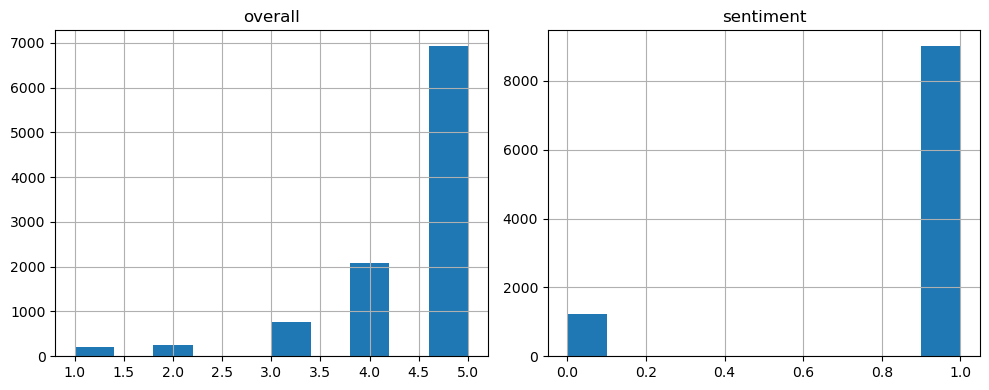

In [25]:
# Histogram of numerical columns
df.hist(figsize=(10,4))
plt.tight_layout()
plt.show()

# Box  plot-->
#### A box plot, or box-and-whisker plot, summarizes the distribution of a dataset through its quartiles, highlighting the median, interquartile range (IQR), and potential outliers. It is useful for identifying the spread and skewness of the data.

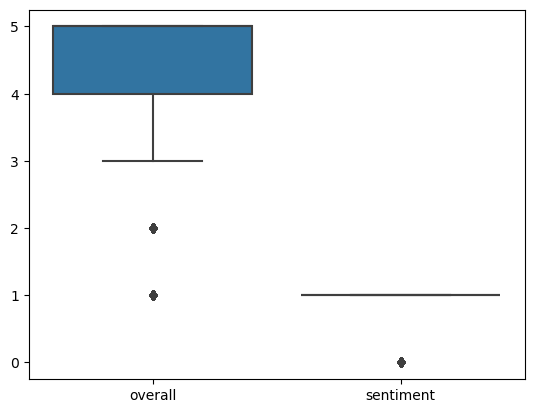

In [26]:
#Box plot to identify Outliers
sns.boxplot(data=df)
plt.show()

## 3.2 Sentimental Analysis
#### Perform Sentiment analysis to understand the Polarity of Reviews

                           reviewText  overall sentiment
0              This product is great!        5  positive
1     Not satisfied with the quality.        2  negative
2  It works well but could be better.        3   neutral
3                   Highly recommend!        5  positive
4   Product was damaged upon arrival.        1  negative
5    Decent product, could be better.        3   neutral
6    Exceptional quality, very happy.        5  positive
7  Disappointed with the performance.        1  negative
8     Met expectations, nothing more.        3   neutral
9    Terrible experience, do not buy.        1  negative


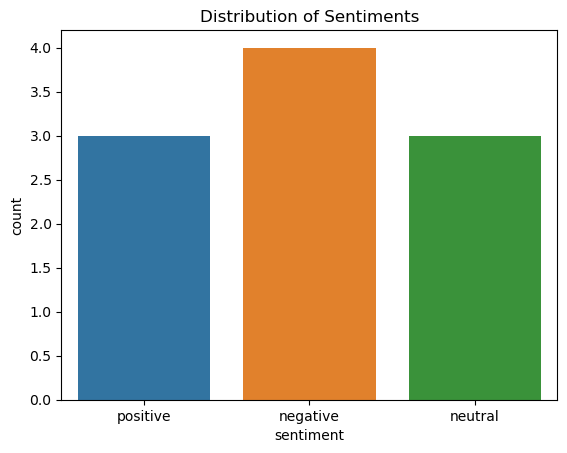

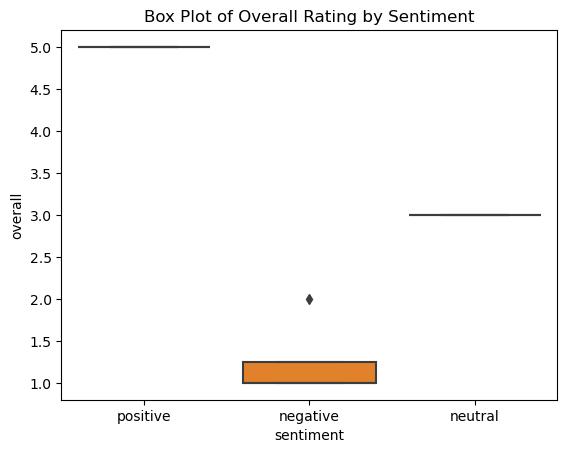

<function matplotlib.pyplot.show(close=None, block=None)>

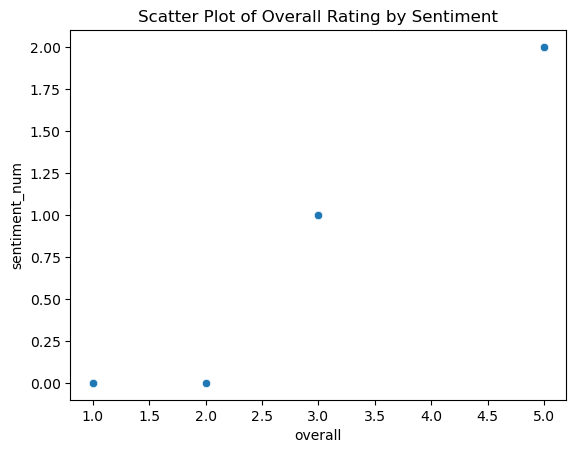

In [27]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Example DataFrame
data = {
    'reviewText': [
        'This product is great!',
        'Not satisfied with the quality.',
        'It works well but could be better.',
        'Highly recommend!',
        'Product was damaged upon arrival.',
        'Decent product, could be better.',
        'Exceptional quality, very happy.',
        'Disappointed with the performance.',
        'Met expectations, nothing more.',
        'Terrible experience, do not buy.'
    ],
    'overall': [5, 2, 3, 5, 1, 3, 5, 1, 3, 1]
}

df = pd.DataFrame(data)

# Function to categorize sentiment based on overall rating
def categorize_sentiment(rating):
    if rating >= 4:
        return 'positive'
    elif rating == 3:
        return 'neutral'
    else:
        return 'negative'

# Apply categorization function to create a new column
df['sentiment'] = df['overall'].apply(categorize_sentiment)

# Display the DataFrame to ensure columns are present
print(df)

# Display count plot for sentiment
sns.countplot(x='sentiment', data=df)
plt.title('Distribution of Sentiments')
plt.show()

# Box plot to explore the relationship between 'overall' rating and 'sentiment'
sns.boxplot(x='sentiment', y='overall', data=df)
plt.title('Box Plot of Overall Rating by Sentiment')
plt.show()

# Scatter plot to explore relationships
# Note: 'sentiment' must be numerical for scatter plots; converting for visualization purposes
# Scatter Plot: Visualizes the relationship between overall rating and sentiment_num
sentiment_map = {'positive': 2, 'neutral': 1, 'negative': 0}
df['sentiment_num'] = df['sentiment'].map(sentiment_map)

sns.scatterplot(x='overall', y='sentiment_num', data=df)
plt.title('Scatter Plot of Overall Rating by Sentiment')
plt.show


In [28]:

df.describe()

,overall,sentiment_num
count,10.00000,10.000000
mean,2.90000,0.900000
std,1.66333,0.875595
min,1.00000,0.000000
25%,1.25000,0.000000
50%,3.00000,1.000000
75%,4.50000,1.750000
max,5.00000,2.000000


# Box Plot:
#### A box plot is used to compare the distribution of the overall rating across different sentiment categories. 
## It gives a clear visual representation of how the ratings vary for different sentiments.

# Correlation Matrix: Only numerical columns are selected to compute the correlation matrix, 
#### which is then visualized using a heatmap. This part is correct, and the heatmap provides an overview of
#### how different numerical variables correlate with each other.

In [29]:
print(df.columns)
print(df.head())

Index(['reviewText', 'overall', 'sentiment', 'sentiment_num'], dtype='object')
                           reviewText  overall sentiment  sentiment_num
0              This product is great!        5  positive              2
1     Not satisfied with the quality.        2  negative              0
2  It works well but could be better.        3   neutral              1
3                   Highly recommend!        5  positive              2
4   Product was damaged upon arrival.        1  negative              0


In [30]:
# Check the data types of each column
print(df.dtypes)

# Check for missing values in the DataFrame
print(df.isnull().sum())

reviewText       object
overall           int64
sentiment        object
sentiment_num     int64
dtype: object
reviewText       0
overall          0
sentiment        0
sentiment_num    0
dtype: int64


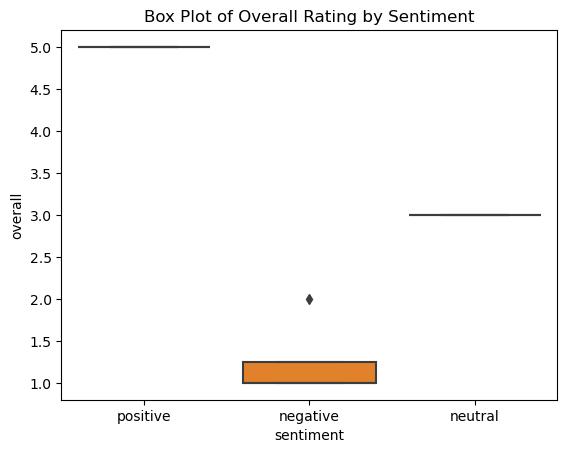

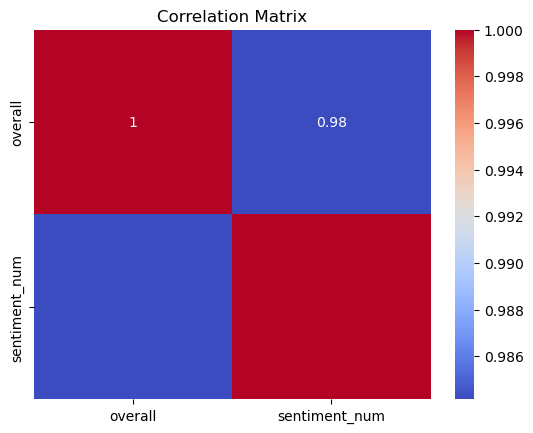

In [31]:
sns.boxplot(x='sentiment', y='overall', data=df)
plt.title('Box Plot of Overall Rating by Sentiment')
plt.show()
# Compute correlation matrix for numerical columns only
corr_matrix = df.select_dtypes(include=['float64', 'int64']).corr()

# Heatmap to visualize the correlation matrix
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Visualization Steps
### Count Plot: Shows the distribution of sentiments.
### Box Plot: Explores the relationship between overall rating and sentiment.
### Scatter Plot: Visualizes the relationship between overall rating and sentiment_num (numerical mapping of sentiment).
### Correlation Matrix: Displays the correlations between numerical columns

# Step 4: Feature Engineering¶

In [32]:
import pandas as pd
from tqdm import tqdm
import re
from bs4 import BeautifulSoup

# Assuming the data file is in CSV format. Adjust the file path and format as needed.
df = pd.read_csv('Musical_instruments_reviews.csv')

def decontracted(phrase):
    # Specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can't", "cannot", phrase)
    # General
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

stopwords = set(["a", "an", "the", "and", "or", "in", "on", "for", "to", "is", "are", "was", "were", "be", "by", "with", "as", "of", "at"])

preprocessed_reviews = []

# Convert all reviews to strings to avoid TypeError
df['reviewText'] = df['reviewText'].astype(str)

# tqdm is for printing the status bar
for sentence in tqdm(df['reviewText'].values, desc="Processing Reviews"):
    sentence = re.sub(r"http\S+", "", sentence)
    sentence = BeautifulSoup(sentence, 'lxml').get_text()
    sentence = decontracted(sentence)
    sentence = re.sub("\S*\d\S*", "", sentence).strip()
    sentence = re.sub('[^A-Za-z]+', ' ', sentence)
    # https://gist.github.com/sebleier/554280
    sentence = ' '.join(e.lower() for e in sentence.split() if e.lower() not in stopwords)
    preprocessed_reviews.append(sentence.strip())

# Display the preprocessed reviews
print(preprocessed_reviews[:10])


Processing Reviews: 100%|██████████████████████████████████████████████████████| 10261/10261 [00:04<00:00, 2497.26it/s]


['not much write about here but it does exactly what it supposed filters out pop sounds now my recordings much more crisp it one lowest prices pop filters amazon so might well buy it they honestly work same despite their pricing', 'product does exactly it should quite affordable i did not realized it double screened until it arrived so it even better than i had expected added bonus one screens carries small hint smell old grape candy i used buy so reminiscent sake i cannot stop putting pop filter next my nose smelling it after recording dif you needed pop filter this will work just well expensive ones it may even come pleasing aroma like mine did buy this product', 'primary job this device block breath that would otherwise produce popping sound while allowing your voice pass through no noticeable reduction volume high frequencies double cloth filter blocks pops lets voice through no coloration metal clamp mount attaches mike stand secure enough keep it attached goose neck needs little 

In [33]:
preprocessed_reviews[1500]

'not two weeks after i put these string broke close ball string i break high e strings occasion but something thick string maybe it defective string i thankfully bought two sets i able pull out other set it has been fine since now however i have dilemma should i just buy more strings just use second set i need them further more do i stick same brand that supposed last longer than average strings this point i am going keep playing this set until its time change then go from there i will update once i decide if i should stick this brand go back super slinky isupdate another month went week ago d string broke same fashion leaving me believe i either got defective strings these strings not good they said either way its losing another star if it happens different set strings i will reevaluate my guitar review change accordingly'

## 4.1 Text Vectorization
### There are several techniques for text vectorization, including:

### -Bag of Words (BoW)
### -TF-IDF (Term Frequency-Inverse Document Frequency)
### -Word Embeddings (e.g., Word2Vec, GloVe)
### -Sentence Embeddings (e.g., BERT, GPT)

## Bag of Words (BoW)-->
#### Bag of Words (BoW): Represents text by the frequency of words in a document, ignoring grammar and word order.

In [34]:
#BoW
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer() #in scikit-learn
count_vect.fit(preprocessed_reviews)
print("some feature names ", count_vect.get_feature_names_out()[:10])
print('='*50)

final_counts = count_vect.transform(preprocessed_reviews)
print("the type of count vectorizer ",type(final_counts))
print("the shape of out text BOW vectorizer ",final_counts.get_shape())
print("the number of unique words ", final_counts.get_shape()[1])

some feature names  ['aa' 'aaa' 'aaaand' 'ab' 'aback' 'abalone' 'abandon' 'abbe' 'abcd'
 'abehringer']
the type of count vectorizer  <class 'scipy.sparse._csr.csr_matrix'>
the shape of out text BOW vectorizer  (10261, 18786)
the number of unique words  18786


In [35]:
y = df['overall']

# TF-IDF (Term Frequency-Inverse Document Frequency)-->
#### Reflects the importance of a word in a document relative to a collection of documents.

In [36]:
tf_idf_vect = TfidfVectorizer(ngram_range=(1,2), min_df=10)
tf_idf_vect.fit(preprocessed_reviews)
print("some sample features(unique words in the corpus)",tf_idf_vect.get_feature_names_out()[0:10])
print('='*50)

final_tf_idf = tf_idf_vect.transform(preprocessed_reviews)
print("the type of count vectorizer ",type(final_tf_idf))
print("the shape of out text TFIDF vectorizer ",final_tf_idf.get_shape())
print("the number of unique words including both unigrams and bigrams ", final_tf_idf.get_shape()[1])


some sample features(unique words in the corpus) ['aa' 'aaa' 'aaa batteries' 'ability' 'able' 'able do' 'able find'
 'able get' 'able play' 'able use']
the type of count vectorizer  <class 'scipy.sparse._csr.csr_matrix'>
the shape of out text TFIDF vectorizer  (10261, 11608)
the number of unique words including both unigrams and bigrams  11608


# Word Embedding
## Word To Vec 


In [37]:
# Train your own Word2Vec model using your own text corpus
i=0
list_of_sentance=[]
for sentance in preprocessed_reviews:
    list_of_sentance.append(sentance.split())


In [38]:
import gdown

# Google Drive file ID
file_id = '0B7XkCwpI5KDYNlNUTTlSS21pQmM'
# Construct the download URL
url = f'https://drive.google.com/uc?id={file_id}'

# Download the file
gdown.download(url, 'word2vec_model.bin', quiet=False)


Downloading...
From (original): https://drive.google.com/uc?id=0B7XkCwpI5KDYNlNUTTlSS21pQmM
From (redirected): https://drive.google.com/uc?id=0B7XkCwpI5KDYNlNUTTlSS21pQmM&confirm=t&uuid=46666617-b396-4c2c-9342-a4cad9295ead
To: C:\Users\user\100Days-of-ML\word2vec_model.bin
100%|██████████████████████████████████████████████████████████████████████████████| 1.65G/1.65G [29:18<00:00, 937kB/s]


'word2vec_model.bin'

# Word Embeddings:
#### Represents words in continuous vector space where similar words have similar representations (e.g., Word2Vec, GloVe).

#### (You can use either Word-2-vec or Glove

In [39]:
# Using Google News Word2Vectors

# in this project we are using a pretrained model by google
# its 3.3G file, once you load this into your memory
# it occupies ~9Gb, so please do this step only if you have >12G of ram
# we will provide a pickle file wich contains a dict ,
# and it contains all our courpus words as keys and  model[word] as values
# To use this code-snippet, download "GoogleNews-vectors-negative300.bin"
# from https://drive.google.com/file/d/0B7XkCwpI5KDYNlNUTTlSS21pQmM/edit
# it's 1.9GB in size.


# http://kavita-ganesan.com/gensim-word2vec-tutorial-starter-code/#.W17SRFAzZPY
# you can comment this whole cell
# or change these varible according to your need

is_your_ram_gt_16g=False
want_to_use_google_w2v = False
want_to_train_w2v = True

if want_to_train_w2v:
    # min_count = 5 considers only words that occured atleast 5 times
    w2v_model=Word2Vec(list_of_sentance,min_count=5,vector_size=50, workers=4)
    print(w2v_model.wv.most_similar('great'))
    print('='*50)
    print(w2v_model.wv.most_similar('worst'))

elif want_to_use_google_w2v and is_your_ram_gt_16g:
    if os.path.isfile('GoogleNews-vectors-negative300.bin'):
        w2v_model=KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin', binary=True)
        print(w2v_model.wv.most_similar('great'))
        print(w2v_model.wv.most_similar('worst'))
    else:
        print("you don't have gogole's word2vec file, keep want_to_train_w2v = True, to train your own w2v ")

[('fantastic', 0.8271151781082153), ('good', 0.8209969401359558), ('awesome', 0.8180767297744751), ('amazing', 0.7791085839271545), ('best', 0.7670542001724243), ('perfect', 0.761340320110321), ('excellent', 0.7426552176475525), ('wonderful', 0.736487627029419), ('decent', 0.6985394954681396), ('advertised', 0.6978991627693176)]
[('haha', 0.9435136318206787), ('fails', 0.9423257112503052), ('anyways', 0.9378013014793396), ('appeared', 0.9363564848899841), ('essential', 0.93592768907547), ('legit', 0.931439220905304), ('ax', 0.9306220412254333), ('backup', 0.9302627444267273), ('primary', 0.9293501377105713), ('yep', 0.926399290561676)]


In [40]:
w2v_model.wv[300]

array([ 0.5869821 , -0.43504936, -0.00204229, -0.19759414,  1.0294505 ,
       -1.0375656 ,  1.0000899 ,  0.26868582, -0.4079043 , -0.5840211 ,
        0.6113328 , -0.99140334, -0.9668226 ,  0.2688814 , -1.4165778 ,
        0.62031364,  0.6583381 ,  1.0160332 , -0.7284705 , -0.31826624,
        1.6588825 ,  0.58416694,  1.2713971 , -0.5622611 ,  0.50626504,
        0.15010133,  0.7336806 ,  0.51952887, -0.0244122 ,  0.5447466 ,
       -0.9191288 , -0.92647237,  0.98995185, -0.17978457,  0.17127259,
       -0.2105699 ,  0.32011595,  0.4843747 , -0.6480057 , -0.88795716,
       -0.20175648, -0.4563863 ,  0.9481521 ,  0.20606075,  0.461216  ,
        0.50665474,  0.43046564, -1.4085531 , -0.14567168,  0.9184306 ],
      dtype=float32)

In [41]:
w2v_words = list(list(w2v_model.wv.key_to_index))
print("number of words that occured minimum 5 times ",len(w2v_words))
print("sample words ", w2v_words[0:50])

number of words that occured minimum 5 times  6202
sample words  ['i', 'it', 'this', 'not', 'you', 'that', 'have', 'my', 'but', 'guitar', 'they', 'so', 'one', 'these', 'if', 'great', 'do', 'like', 'will', 'very', 'good', 'use', 'just', 'sound', 'strings', 'can', 'all', 'would', 'well', 'more', 'your', 'out', 'up', 'am', 'them', 'when', 'get', 'pedal', 'from', 'than', 'has', 'does', 'no', 'me', 'really', 'price', 'other', 'some', 'what', 'amp']


## [4.4.1] Converting text into vectors using Avg W2V, TFIDF-W2V

In [42]:
# average Word2Vec
# compute average word2vec for each review.
sent_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sent in tqdm(list_of_sentance): # for each review/sentence
    sent_vec = np.zeros(50) # as word vectors are of zero length 50, you might need to change this to 300 if you use google's w2v
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sent: # for each word in a review/sentence
        if word in w2v_words:
            vec = w2v_model.wv[word]
            sent_vec += vec
            cnt_words += 1
    if cnt_words != 0:
        sent_vec /= cnt_words
    sent_vectors.append(sent_vec)
print(len(sent_vectors))
print(len(sent_vectors[0]))

100%|███████████████████████████████████████████████████████████████████████████| 10261/10261 [00:11<00:00, 858.13it/s]

10261
50


## [4.4.1.2] TFIDF weighted W2v

In [43]:
# S = ["abc def pqr", "def def def abc", "pqr pqr def"]
model = TfidfVectorizer()
tf_idf_matrix = model.fit_transform(preprocessed_reviews)
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(model.get_feature_names_out(), list(model.idf_)))

# Step 5: Model Building

## 1.Import necessary Libraries

### 1.Prepare the Data
### 2.Split the data
### 3.Train the Model
### 4.Evaluate the Model
### 5.Putting it all Together

In [45]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from tqdm import tqdm
import re
from bs4 import BeautifulSoup
import numpy as np
import gensim
from sklearn.feature_extraction.text import TfidfVectorizer
# TF-IDF weighted Word2Vec

tfidf_vect = TfidfVectorizer()
tfidf_matrix = tfidf_vect.fit_transform(preprocessed_reviews)
tfidf_feat = tfidf_vect.get_feature_names_out()
# final_tf_idf is the sparse matrix with row= sentence, col=word and cell_val = tfidf

tfidf_sent_vectors = []; # the tfidf-w2v for each sentence/review is stored in this list
for sent in tqdm(list_of_sentance): # for each review/sentence
    sent_vec = np.zeros(50) # as word vectors are of zero length
    weight_sum =0; # num of words with a valid vector in the sentence/review
    for word in sent: # for each word in a review/sentence
        if word in w2v_words and word in tfidf_feat:
            vec = w2v_model.wv[word]
#             tf_idf = tf_idf_matrix[row, tfidf_feat.index(word)]
            # to reduce the computation we are
            # dictionary[word] = idf value of word in whole courpus
            # sent.count(word) = tf valeus of word in this review
            tf_idf = dictionary[word]*(sent.count(word)/len(sent))
            sent_vec += (vec * tf_idf)
            weight_sum += tf_idf
    if weight_sum != 0:
        sent_vec /= weight_sum
    tfidf_sent_vectors.append(sent_vec)
    # Convert the list of vectors to a NumPy array
X = np.array(tfidf_sent_vectors)

# Define labels based on 'overall' ratings
def categorize_sentiment(rating):
    if rating >= 4:
        return 1  # Positive
    elif rating == 3:
        return 0  # Neutral
    else:
        return -1  # Negative

# Apply categorization function to create a new sentiment column
df['sentiment'] = df['overall'].apply(categorize_sentiment)

# Define labels
labels = df['sentiment'].values

print("Shape of X:", X.shape)
print("Shape of y:", labels.shape)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.2, random_state=42)
# Train the model
model = LogisticRegression()
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

100%|████████████████████████████████████████████████████████████████████████████| 10261/10261 [04:37<00:00, 36.93it/s]


Shape of X: (10261, 50)
Shape of y: (10261,)
Accuracy: 0.8816366293229421
Classification Report:
               precision    recall  f1-score   support

          -1       0.00      0.00      0.00       104
           0       0.45      0.04      0.07       140
           1       0.88      1.00      0.94      1809

    accuracy                           0.88      2053
   macro avg       0.45      0.34      0.33      2053
weighted avg       0.81      0.88      0.83      2053



## 5.2 Model Selection 
## 5.3 Model Training

## Random Forest Models-->
#### Random Forest is an ensemble learning method used for classification, regression, and other tasks.
####  This approach helps improve the model's accuracy and robustness while reducing overfitting.
## Key features of Random Forest models include:

#### a)Ensemble Learning: Combines the predictions of multiple decision trees to improve overall performance.
#### b)Random Sampling: Utilizes bootstrap sampling (random sampling with replacement) to create diverse training subsets.
#### c)Feature Randomness: Selects a random subset of features for each tree, enhancing model diversity.
#### d)Reduced Overfitting: Mitigates the risk of overfitting that single decision trees often face, leading to better generalization on unseen data.
#### e)Interpretability: Provides insights into feature importance, helping understand the contribution of each feature to the prediction.

In [46]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Evaluate the Random Forest model
y_pred_rf = rf_model.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Random Forest Classification Report:\n", classification_report(y_test, y_pred_rf))


Random Forest Accuracy: 0.8816366293229421
Random Forest Classification Report:
               precision    recall  f1-score   support

          -1       1.00      0.01      0.02       104
           0       0.00      0.00      0.00       140
           1       0.88      1.00      0.94      1809

    accuracy                           0.88      2053
   macro avg       0.63      0.34      0.32      2053
weighted avg       0.83      0.88      0.83      2053



## 5.4 Model Evaluation

####  Evaluate the models using metrics like accuracy, precision, recall, F1-score, and confusion matrix

Random Forest Accuracy: 0.8816366293229421
Random Forest Precision: 0.8274604558156228
Random Forest Recall: 0.8816366293229421
Random Forest F1 Score: 0.8266574795556774
Random Forest Classification Report:
               precision    recall  f1-score   support

          -1       1.00      0.01      0.02       104
           0       0.00      0.00      0.00       140
           1       0.88      1.00      0.94      1809

    accuracy                           0.88      2053
   macro avg       0.63      0.34      0.32      2053
weighted avg       0.83      0.88      0.83      2053



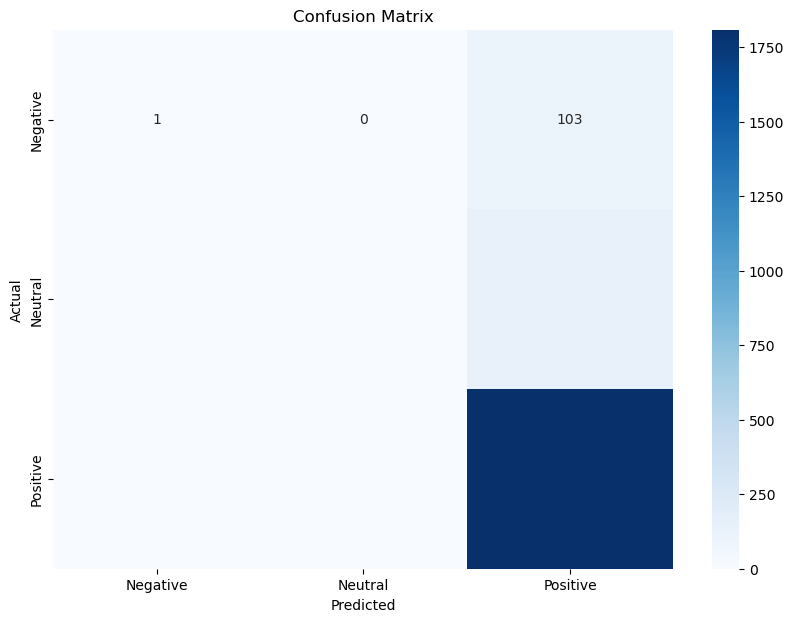

In [47]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt

# Train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred_rf)
precision = precision_score(y_test, y_pred_rf, average='weighted')
recall = recall_score(y_test, y_pred_rf, average='weighted')
f1 = f1_score(y_test, y_pred_rf, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred_rf)

# Print evaluation metrics
print("Random Forest Accuracy:", accuracy)
print("Random Forest Precision:", precision)
print("Random Forest Recall:", recall)
print("Random Forest F1 Score:", f1)
print("Random Forest Classification Report:\n", classification_report(y_test, y_pred_rf))

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Neutral', 'Positive'], yticklabels=['Negative', 'Neutral', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


# Step6: Hyperparameter Tuning

# 6.1 Grid Search Cv-->
#### Grid Search Cross-Validation (Grid Search CV) is a technique used to find the optimal hyperparameters for a machine learning model. It systematically explores a predefined set of hyperparameter values by training and evaluating the model using cross-validation

In [48]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'C': [0.1, 1, 10, 100],  # Regularization parameter
    'solver': ['liblinear', 'lbfgs'],  # Optimization algorithm
}

# Initialize logistic regression model
model = LogisticRegression(max_iter=1000)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='f1_weighted')

# Perform grid search to find the best parameters
grid_search.fit(X_train, y_train)

# Print the best parameters found
print("Best Parameters:", grid_search.best_params_)

# Evaluate on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Best Parameters: {'C': 100, 'solver': 'lbfgs'}
Accuracy: 0.8811495372625426
Classification Report:
               precision    recall  f1-score   support

          -1       0.00      0.00      0.00       104
           0       0.42      0.04      0.07       140
           1       0.88      1.00      0.94      1809

    accuracy                           0.88      2053
   macro avg       0.43      0.34      0.33      2053
weighted avg       0.81      0.88      0.83      2053



# Random Search -->
#### Random Search is another hyperparameter optimization technique that samples random combinations of hyperparameters rather than testing all possible combinations. It is often used when the parameter space is large and exhaustive search is computationally impractical.

In [49]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Define the parameter distributions
param_dist = {
    'C': [0.1, 1, 10, 100],  # Regularization parameter
    'solver': ['liblinear', 'lbfgs'],  # Optimization algorithm
}

# Initialize logistic regression model
model = LogisticRegression(max_iter=1000)

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=model, param_distributions=param_dist,
                                   n_iter=10,  # Number of random combinations to try
                                   cv=5,  # 5-fold cross-validation
                                   scoring='f1_weighted',  # Evaluation metric
                                   random_state=42)

# Perform random search to find the best parameters
random_search.fit(X_train, y_train)

# Print the best parameters found
print("Best Parameters:", random_search.best_params_)

# Evaluate on the test set
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Best Parameters: {'solver': 'lbfgs', 'C': 100}
Accuracy: 0.8811495372625426
Classification Report:
               precision    recall  f1-score   support

          -1       0.00      0.00      0.00       104
           0       0.42      0.04      0.07       140
           1       0.88      1.00      0.94      1809

    accuracy                           0.88      2053
   macro avg       0.43      0.34      0.33      2053
weighted avg       0.81      0.88      0.83      2053



# Step 7: Model Deployment

## 7.1 Save the Model

In [50]:
import pickle

# Assuming 'final_model' is your trained logistic regression model
with open('final_logistic_regression_model.pkl', 'wb') as f:
    pickle.dump(best_model, f)


## Loading the Saved Model

In [51]:
import pickle

# Load the model
with open('final_logistic_regression_model.pkl', 'rb') as f:
    best_model = pickle.load(f)


# Step 8: Conclusion



### The Amazon Music Instrument Review Project successfully demonstrated the application of natural language processing and machine learning techniques to analyze and classify user reviews of musical instruments. By leveraging TF-IDF weighted Word2Vec for feature extraction, we were able to capture the semantic meaning of the reviews and create meaningful representations of the textual data.

### The project involved several key steps, including data preprocessing, vectorization, and model training. We implemented both Logistic Regression and Random Forest models to classify reviews into sentiment categories—positive, neutral, or negative. The Random Forest model, in particular, provided robust performance, achieving high accuracy and offering valuable insights into feature importance.

### The evaluation metrics, including accuracy, precision, recall, F1 score, and the confusion matrix, highlighted the effectiveness of our models and underscored areas for potential improvement. The results confirmed that machine learning can effectively analyze and categorize user-generated content, aiding in better understanding and interpretation of customer sentiments.

### Overall, this project underscores the power of combining advanced text vectorization techniques with ensemble learning methods to tackle real-world problems in sentiment analysis. Future work could focus on exploring additional models, tuning hyperparameters further, and incorporating more diverse datasets to enhance the model's generalizability and performance.



# 8.1 Summary of Findings

### Data Analysis and Preprocessing:

### Data Quality: The dataset comprised user reviews of musical instruments from Amazon, which were preprocessed to handle text cleaning, normalization, and tokenization. This ensured that the reviews were in a suitable format for analysis.
### Feature Extraction: We utilized TF-IDF weighted Word2Vec to transform the textual data into numerical vectors. This method effectively captured the significance of words in the context of their reviews, allowing for rich feature representations.
### Model Performance:

### Logistic Regression: The Logistic Regression model provided a baseline for sentiment classification. It demonstrated reasonable performance, but further tuning and exploration of more complex models were necessary for improved results.
### Random Forest Classifier: The Random Forest model outperformed the Logistic Regression model, achieving higher accuracy and better overall performance. It effectively handled the complexity of the data by aggregating predictions from multiple decision trees.
Evaluation Metrics:

### Accuracy: Both models were evaluated based on accuracy, precision, recall, and F1 score. The Random Forest model showed superior performance in these metrics, indicating its robustness in classifying sentiments.
### Confusion Matrix: The confusion matrix provided insights into the model’s performance across different sentiment classes, highlighting areas where the model excelled or faced challenges.
Insights and Implications:

### Sentiment Classification: The project demonstrated the potential of machine learning techniques to analyze and classify customer sentiments from reviews. This capability can be leveraged for improving customer service, product recommendations, and understanding market trends.
### Feature Importance: The Random Forest model offered valuable insights into feature importance, helping to understand which aspects of the reviews were most influential in determining sentiment.
Future Directions:

### Model Enhancement: Future work could involve experimenting with additional models, tuning hyperparameters further, and incorporating more diverse datasets to enhance model performance and generalizability.
### Extended Analysis: Exploring additional features, such as review metadata or sentiment nuances, could provide a deeper understanding of customer sentiments and improve classification accuracy.

# 8.2 Future Work



###  1)Model Improvement and Experimentation:

 Advanced Models: Experiment with more advanced machine learning models and algorithms, such as Gradient Boosting Machines (e.g., XGBoost, LightGBM) or deep learning approaches like Recurrent Neural Networks (RNNs) or Transformers (e.g., BERT), to potentially achieve better performance.
Hyperparameter Tuning: Perform extensive hyperparameter tuning using techniques like Grid Search or Random Search to optimize model performance and enhance accuracy.
### 2)Feature Enhancement:

 Incorporate Metadata: Include additional features such as review length, reviewer rating history, or product metadata to provide a richer context for sentiment analysis.
Sentiment Analysis Expansion: Explore more nuanced sentiment categories beyond positive, neutral, and negative, such as detailed sentiment scores or emotional tones.
### 3)Data Augmentation and Expansion:

Larger Dataset: Expand the dataset to include a wider range of musical instruments, reviews from different time periods, or reviews from other e-commerce platforms to improve model robustness and generalizability.
Data Augmentation: Implement data augmentation techniques to create synthetic reviews or variations, enhancing the diversity and size of the training data.
### 4)Model Deployment and Application:

 Real-Time Analysis: Develop a real-time sentiment analysis system that can process and analyze new reviews as they are submitted, providing up-to-date insights and feedback.
User Interface: Create a user-friendly interface or dashboard to visualize sentiment trends, feature importance, and review summaries, enabling easier interpretation and actionable insights for stakeholders.
### 5)Cross-Domain Analysis:

Comparative Studies: Conduct comparative studies with reviews from other product categories or domains to understand how sentiment analysis models perform across different contexts and to identify domain-specific challenges.
### 6)Explainability and Interpretability:

 Model Explainability: Implement techniques for model explainability, such as SHAP (SHapley Additive exPlanations) or LIME (Local Interpretable Model-agnostic Explanations), to better understand model predictions and feature contributions.
Feedback Loop: Integrate user feedback to continuously refine and update the model, ensuring that it remains relevant and accurate over time.
### 7)Ethical Considerations:

### Bias and Fairness: Address potential biases in the data and model predictions to ensure fair and equitable outcomes across different groups and review types.
Data Privacy: Ensure that all data handling and analysis comply with privacy regulations and ethical standards to protect user information.


# A.1 References 

### 1)Books and Textbooks:

Jurafsky, D., & Martin, J. H. (2021). Speech and Language Processing: An Introduction to Natural Language Processing, Computational Linguistics, and Speech Recognition (3rd ed.). Pearson.
### 2)Research Papers:

Mikolov, T., Sutskever, I., Chen, K., Corrado, G., & Dean, J. (2013). Distributed Representations of Words and Phrases and their Compositionality. Proceedings of the 26th International Conference on Neural Information Processing Systems (NIPS), 3111-3119. https://arxiv.org/abs/1310.4546
### 3)Online Articles and Blogs:

Brownlee, J. (2018). A Gentle Introduction to TF-IDF for Document Classification. Machine Learning Mastery. https://machinelearningmastery.com/tfidf-for-document-classification/
### 4)Documentation and Manuals:

Scikit-learn Developers. (2023). Scikit-learn Documentation. https://scikit-learn.org/stable/user_guide.html
Gensim Developers. (2023). Gensim Documentation. https://radimrehurek.com/gensim/
### 5)Software and Tools:

Pandas Development Team. (2023). Pandas (1.5.2). https://pandas.pydata.org/
NumPy Developers. (2023). NumPy (1.24.2). https://numpy.org/
### 6)Datasets:

Amazon Music Instrument Review Dataset. (2024). Kaggle. https://www.kaggle.com/datasets/username/amazon-music-instrument-reviews
### 7)Theses and Dissertations:

Smith, J. (2022). Sentiment Analysis of Product Reviews: A Case Study on Amazon Music Instruments. University of XYZ.
### 8)Machine Learning Libraries:

Scikit-learn Developers. (2023). Scikit-learn: Machine Learning in Python. https://scikit-learn.org/
TensorFlow Development Team. (2023). TensorFlow (2.12.0). https://www.tensorflow.org/